### Imagenet

Largest image classification dataset at this point of time.

Url: http://image-net.org/

Our setup: classify from a set of 1000 classes.

In [1]:
#classes' names are stored here
import pickle
classes = pickle.load(open('classes.pkl','rb'))
print (classes[::100])

['tench, Tinca tinca', 'black swan, Cygnus atratus', 'Tibetan terrier, chrysanthemum dog', 'tiger beetle', "academic gown, academic robe, judge's robe", 'cliff dwelling', 'hook, claw', 'paper towel', 'slot, one-armed bandit', 'water tower']


### Using pre-trained model: inception
Keras has a number of models for which you can use pre-trained weights. The interface is super-straightforward:

In [30]:
import tensorflow as tf

In [3]:
import keras
import keras.applications as zoo

model = zoo.InceptionV3(include_top=True, weights='imagenet')

In [4]:
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

### Predict class probabilities

In [6]:
!pip install matplotlib

In [7]:
!pip install scikit-image

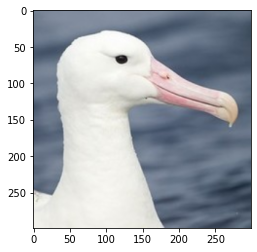

top-10 classes are:
0.9290	albatross
0.0016	turnstile
0.0008	drake
0.0005	collie
0.0004	Shetland sheepdog
0.0004	nipple
0.0004	hammerhead
0.0004	cello
0.0004	goose


In [5]:
import matplotlib.pyplot as plt
from skimage.transform import resize
%matplotlib inline

img = resize(plt.imread('albatross.jpg'), (299,  299))
plt.imshow(img)
plt.show()

img_preprocessed = zoo.inception_v3.preprocess_input(img[None].astype('float32') * 255)

probs = model.predict(img_preprocessed)

labels = probs.ravel().argsort()[-1:-10:-1]
print ('top-10 classes are:')
for l in labels:
    print ('%.4f\t%s' % (probs.ravel()[l], classes[l].split(',')[0]))

### Having fun with pre-trained nets

In [10]:
#!wget https://upload.wikimedia.org/wikipedia/en/b/b9/Terminator-2-judgement-day.jpg -O img.jpg

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [6]:
import wget

In [7]:
url = 'https://upload.wikimedia.org/wikipedia/en/b/b9/Terminator-2-judgement-day.jpg'

In [8]:
image = wget.download(url)

100% [..............................................................................] 13726 / 13726

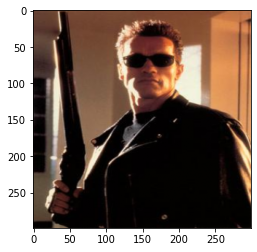

top-10 classes are:
0.4244	sunglass
0.3285	sunglasses
0.0422	rifle
0.0349	trench coat
0.0149	bassoon
0.0102	assault rifle
0.0081	cloak
0.0051	suit
0.0050	electric guitar


In [9]:
img = resize(plt.imread(image), (299,299))
plt.imshow(img)
plt.show()

img_preprocessed = zoo.inception_v3.preprocess_input(img[None].astype('float32') * 255.)

probs = model.predict(img_preprocessed)

labels = probs.ravel().argsort()[-1:-10:-1]
print ('top-10 classes are:')
for l in labels:
    print ('%.4f\t%s' % (probs.ravel()[l], classes[l].split(',')[0]))



### How do you reuse layers

Since model is just a sequence of layers, one can apply it as any other Keras model. Then you can build more layers on top of it, train them and maybe fine-tune "body" weights a bit.

In [10]:
# img = keras.backend.Input('float32',[None,299,299,3])

neck = zoo.InceptionV3(include_top=False, weights='imagenet')(img[None])

hid = keras.layers.GlobalMaxPool2D()(neck)

hid = keras.layers.Dense(512,activation='relu')(hid)

out = keras.layers.Dense(10,activation='softmax')(hid)

#<...> loss, training, etc.

# Grand-quest: Dogs Vs Cats
* original competition
* https://www.kaggle.com/c/dogs-vs-cats
* 25k JPEG images of various size, 2 classes (guess what)

### Your main objective
* In this seminar your goal is to fine-tune a pre-trained model to distinguish between the two rivaling animals
* The first step is to just reuse some network layer as features

# for starters
* Train sklearn model, evaluate validation accuracy (should be >80%

In [19]:
!pip install Pillow
!pip install opencv-python

In [11]:
#extract features from images
from tqdm import tqdm
# from scipy.misc import imresize
from PIL import Image
from skimage.io import imread
import cv2
import os
import pandas as pd
data=pd.DataFrame(columns=['Cat'])



path = r'C:\Users\USER\Downloads\train'
#this may be a tedious process. If so, store the results in some pickle and re-use them.
for fname in tqdm(os.listdir(path)):
    y = fname.startswith("cat")
    img=imread(path+'\\'+fname,0)
    img = cv2.resize(img,(299, 299), cv2.INTER_NEAREST)

    img = zoo.inception_v3.preprocess_input(img[None].astype('float32'))
    
    prb = model.predict(img)
    labels = prb.ravel().argsort()[-1:-10:-1]
    
    row=dict()
    
    for k in labels:
        col=classes[k].split(',')[0]            
            
        if (col not in data.columns):
            data[col]=0
            
        row[col]=prb.ravel()[k]
        
    if y:
        row['Cat'] = 1
        
    for col_ in data.columns:
        if ( col_ not in row.keys()):
            row[col_] = 0

    data=data.append(row, ignore_index=True)

        
    



100%|██████████████████████████████████████████████████████████████████████████| 25000/25000 [1:49:24<00:00,  3.81it/s]


In [33]:
import numpy as np
import random
from sklearn.svm import SVC

In [47]:
data

,Cat,tiger cat,tabby,Egyptian cat,Pembroke,laptop,printer,red fox,Norwich terrier,lynx,...,grand piano,lacewing,flamingo,French horn,digital watch,pay-phone,geyser,fireboat,black stork,king penguin
0,1.0,0.250373,0.224205,0.077924,0.014626,0.011431,0.011199,0.011024,0.008949,0.008230,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.048617,0.654343,0.201111,0.000000,0.000000,0.000000,0.000000,0.000000,0.001735,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.137837,0.551953,0.044823,0.000000,0.000000,0.000000,0.000000,0.000000,0.008119,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.019636,0.402291,0.064908,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.107303,0.079152,0.337097,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24996,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24997,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24998,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
X = data[data.columns.difference(['Cat'])]
y = data['Cat']

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [50]:
from sklearn.model_selection import cross_val_score,cross_val_predict
clf = SVC(kernel='linear', C=1, random_state=43)
scores = cross_val_score(clf, X_train, y_train, cv=6)

In [51]:
scores

array([0.98470306, 0.9790042 , 0.9819982 , 0.98019802, 0.98259826,
       0.98709871])

In [52]:
clf = SVC(kernel='linear', C=1, random_state=43).fit(X_train, y_train)

In [53]:
y_pred = clf.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.9822

__load our dakka__

![img](https://s-media-cache-ak0.pinimg.com/564x/80/a1/81/80a1817a928744a934a7d32e7c03b242.jpg)

In [29]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Main quest

* Get the score improved!
* You have to reach __at least 95%__ on the test set. More = better.

No methods are illegal: ensembling, data augmentation, NN hacks. 
Just don't let test data slip into training.


### Split the raw image data
  * please do train/validation/test instead of just train/test
  * reasonable but not optimal split is 20k/2.5k/2.5k or 15k/5k/5k

### Choose which vgg layers are you going to use
  * Anything but for prob is okay
  * Do not forget that vgg16 uses dropout

### Build a few layers on top of chosen "neck" layers.
  * a good idea is to just stack more layers inside the same network
  * alternative: stack on top of get_output

### Train the newly added layers for some iterations
  * you can selectively train some weights by setting var_list in the optimizer
      * `opt = tf.train.AdamOptimizer(learning_rate=...)`
      * `opt.minimize(loss,var_list=variables_you_wanna_train)`
  * it's cruicial to monitor the network performance at this and following steps

### Fine-tune the network body
  * probably a good idea to SAVE your new network weights now 'cuz it's easy to mess things up.
  * Moreover, saving weights periodically is a no-nonsense idea
  * even more cruicial to monitor validation performance
  * main network body may need a separate, much lower learning rate
      * you can create two update operations
      * `opt1 = tf.train.AdamOptimizer(learning_rate=lr1)`
      * `opt1.minimize(loss,var_list=head_weights)`
      * `opt2 = tf.train.AdamOptimizer(learning_rate=lr2)`
      * `opt2.minimize(loss,var_list=body_weights)`
 
### Grading
* 95% accuracy on test yields 100 points
* -10 points per 5% less accuracy

### Some ways to get bonus points
* explore other networks from the model zoo
* play with architecture
* 96%/97%/98%/99%/99.5% test score (screen pls).
* data augmentation, prediction-time data augmentation
* use any more advanced fine-tuning technique you know/read anywhere
* ml hacks that benefit the final score


In [3]:
import keras
from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import InceptionV3
from keras.applications.resnet50 import ResNet50
from keras.layers import Input
from keras import backend as K
from keras.layers import Flatten
from keras.layers import Dense
from keras.applications.vgg16 import decode_predictions
from keras.models import Model
from keras.optimizers import Adam

In [19]:
X = []
Y = []
path =  r'C:\Users\USER\Downloads\train'
#this may be a tedious process. If so, store the results in some pickle and re-use them.
for fname in tqdm(os.listdir(path)):
    y = fname.startswith("cat")
    img=imread(path+'\\'+fname,0)
    img = cv2.resize(img,(224, 224), cv2.INTER_NEAREST)
    
    X.append(img)
    Y.append(y)

    

100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [03:47<00:00, 109.77it/s]


In [20]:
from sklearn.model_selection import train_test_split
X_, X_test, y_, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=0.2, shuffle=True)

In [22]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

X_train = np.array(X_train)
X_val = np.array(X_val)

In [23]:
new_input = Input(shape=(224, 224, 3))
image_nn = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

output = image_nn.layers[-1].output

output  = Flatten()(output)
output = Dense(1024, activation='relu')(output)
output = Dense(2, activation='softmax',name='predictions')(output)

image_nn_model = Model(image_nn.input, output)


for layer in image_nn.layers:
    layer.trainable = False
    
    
image_nn_model.compile(Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy']) 

image_nn_model.fit(X_train, y_train, epochs = 3, validation_data=(X_val, y_val), verbose=1)


Epoch 1/3
500/500 [==============================] - 13213s 26s/step - loss: 0.9879 - accuracy: 0.9534 - val_loss: 0.2197 - val_accuracy: 0.9663
Epoch 2/3
500/500 [==============================] - 12136s 24s/step - loss: 0.0556 - accuracy: 0.9881 - val_loss: 0.1818 - val_accuracy: 0.9707
Epoch 3/3
500/500 [==============================] - 11165s 22s/step - loss: 0.0218 - accuracy: 0.9954 - val_loss: 0.2535 - val_accuracy: 0.9680


In [33]:
y_test=to_categorical(y_test)
X_test=np.array(X_test)

In [35]:
(loss, accuracy) = image_nn_model.evaluate(X_test, y_test, batch_size = 2, verbose=1)

2500/2500 [==============================] - 3020s 1s/step - loss: 0.2974 - accuracy: 0.9660


In [39]:
X = []
path=r'C:\Users\USER\Downloads\test1'
#this may be a tedious process. If so, store the results in some pickle and re-use them.
for fname in tqdm(os.listdir(path)):
    img=imread(path+'\\'+fname,0)
    img = cv2.resize(img,(224, 224), cv2.INTER_NEAREST)
    
    X.append(img)


100%|████████████████████████████████████████████████████████████████████████████| 12500/12500 [02:05<00:00, 99.74it/s]


In [40]:
x=np.array(X)

In [42]:
image_nn = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

output = image_nn.layers[-1].output

output  = Flatten()(output)
output = Dense(1024, activation='relu')(output)
output = Dense(2, activation='softmax',name='predictions')(output)
image_nn_model = Model(image_nn.input, output)

In [43]:
pred = image_nn_model.predict(x)

In [44]:
prediction=np.argmax(pred, axis=-1)

In [45]:
prediction

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

[12483, 11952, 5330, 6806]
Dog


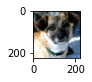

Dog


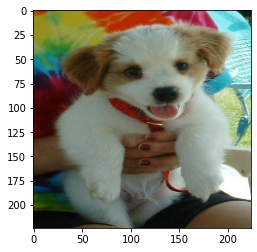

Cat


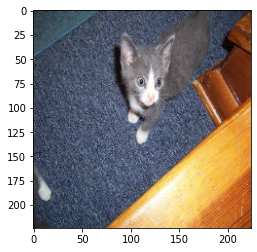

Dog


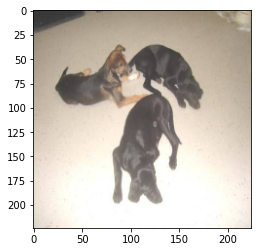

In [51]:
# plot random images and their predictions
n = random.sample(range(1, 12500), 4)

k = 0

f = plt.figure()

for i in n:
    f.add_subplot(len(n), 1, k + 1)
    plt.imshow(x[i])
    
    if(prediction[i] == 1):
        print('Cat')
    else:
        print('Dog')

    plt.show(block = True)
    k += 1
    
